In [63]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [64]:
# Get the dataset
df = pd.read_csv('Mall_Customers.csv')

In [65]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

Looking at distribution of a single variable

In [66]:
# Distribution
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [67]:
# Gender comparison
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

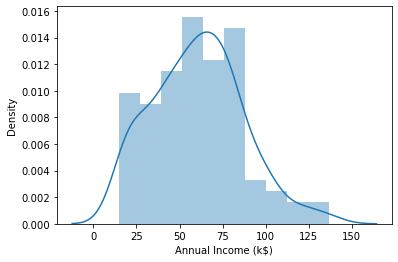

In [68]:
# Spending Score
sns.distplot(df['Annual Income (k$)']);

Presents normal distribution for annual income.

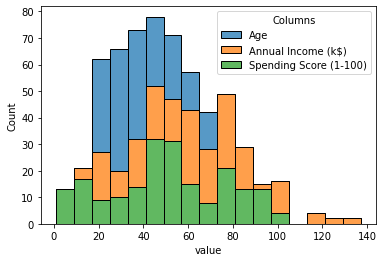

In [69]:
# All columns at once
Columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
sns.histplot(data=df[Columns].melt(var_name='Columns'), x='value', hue='Columns', multiple='stack');

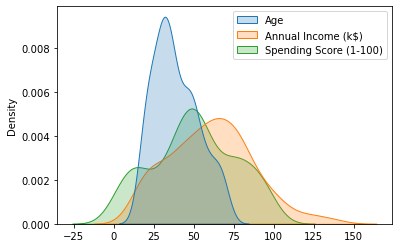

In [70]:
# Distribution based on gender
# Cumulative plot
Columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
sns.kdeplot(data=df[Columns],shade=True);

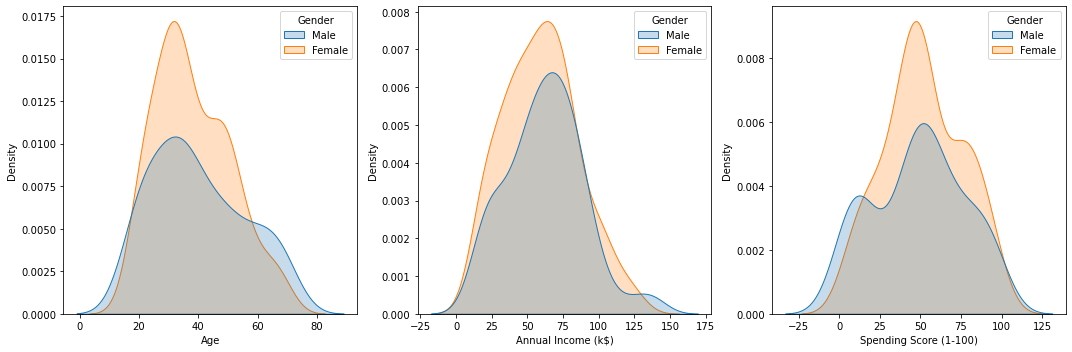

In [71]:
# Individual plot
Columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

for i, x in enumerate(Columns):
    sns.kdeplot(df[x], shade=True, hue=df['Gender'], ax=axs[i])

plt.tight_layout()
plt.show()

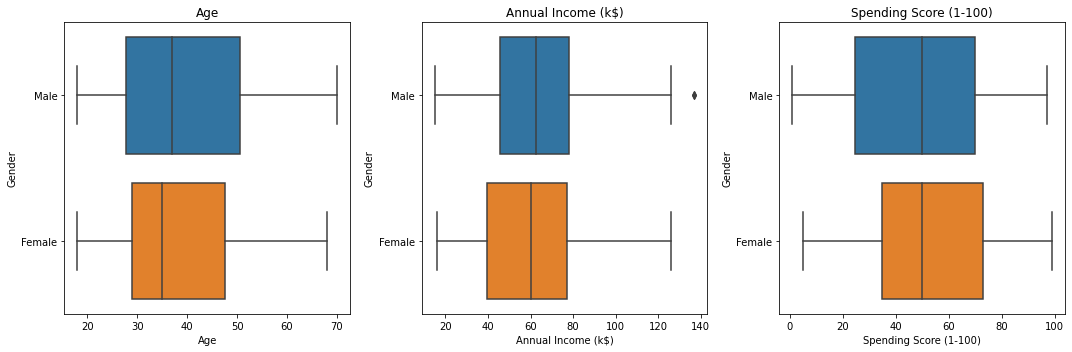

In [72]:
# Boxplots

Columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

fig, axs = plt.subplots(ncols=3, figsize=(15,5))
for i, j in enumerate(Columns):
    sns.boxplot(data=df,y='Gender', x=j, ax=axs[i], orient='h')
    axs[i].set_title(j)
    
plt.tight_layout()
plt.show()

Notice the outlier on the second plot (on annual income boxplot)

# Bivariate Analysis

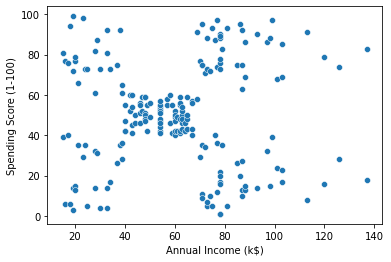

In [73]:
# Scater data

sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)');

About five undefined clusters of data.

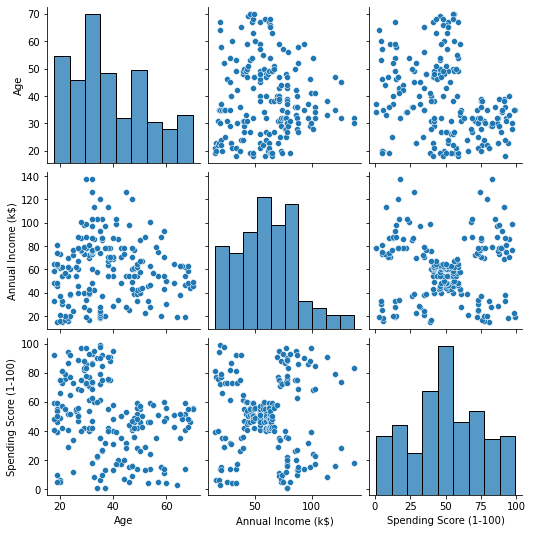

In [74]:
# Pairplots
# ID does not manifest any value on pairplots

df=df.drop('CustomerID', axis=1)

# Plot

sns.pairplot(df);

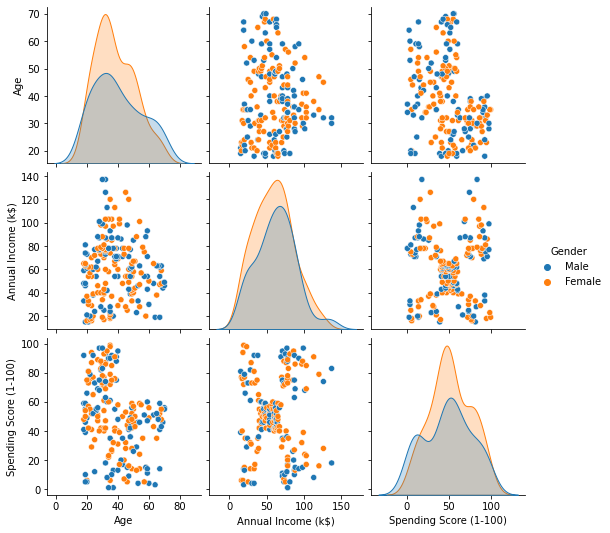

In [75]:
# Plot

sns.pairplot(df,hue='Gender');

In [76]:
# Mean values by gender

df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [77]:
# Correlation

df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


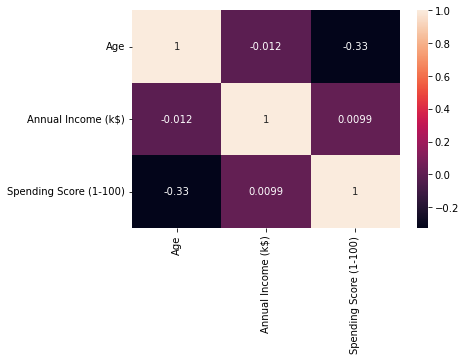

In [78]:
# Heatmap

sns.heatmap(df.corr(),annot=True);

# KMeans Clustering

#### Univariate cluster

In [79]:
# Clustering Annual Income

#First Clustering
clus1 = KMeans(n_clusters=7)

In [80]:
clus1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=7)

In [81]:
# Cluster labels
clus1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [82]:
# Compare with DF

df['Income_Cluster1'] = clus1.labels_

In [83]:
# Cluster density

df['Income_Cluster1'].value_counts()

0    42
5    36
1    32
2    28
6    28
4    26
3     8
Name: Income_Cluster1, dtype: int64

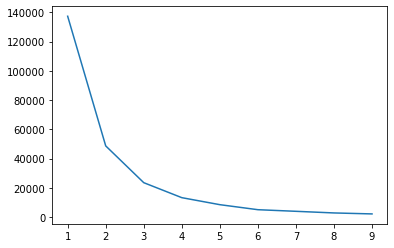

In [84]:
# Plot1
inertiaScores = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertiaScores.append(kmeans.inertia_)

# Plot
plt.plot(range(1,10),inertiaScores);

In [85]:
# Mean
df.groupby('Income_Cluster1')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income_Cluster1,,,
0,35.428571,75.095238,51.095238
1,34.906250,22.000000,49.656250
2,46.035714,50.428571,50.892857
3,36.500000,124.000000,49.625000
4,39.846154,38.846154,49.730769
5,41.055556,62.111111,49.000000
6,38.214286,93.000000,50.928571


Elbow starts at three. We repeat the process with 3 clusters

In [86]:
# Second Clustering
clus2 = KMeans(n_clusters=3)
clus2.fit(df[['Annual Income (k$)']])
df['Income_Cluster2'] = clus2.labels_

In [87]:
df['Income_Cluster2'].value_counts()

2    90
0    74
1    36
Name: Income_Cluster2, dtype: int64

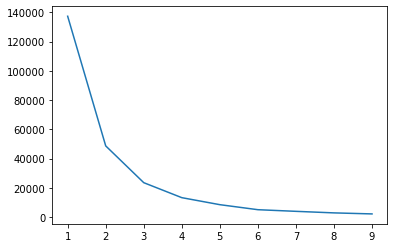

In [88]:
#Plot2
inertiaScores = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertiaScores.append(kmeans.inertia_)

# Plot
plt.plot(range(1,10),inertiaScores);

In [89]:
# Mean
df.groupby('Income_Cluster2')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income_Cluster2,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


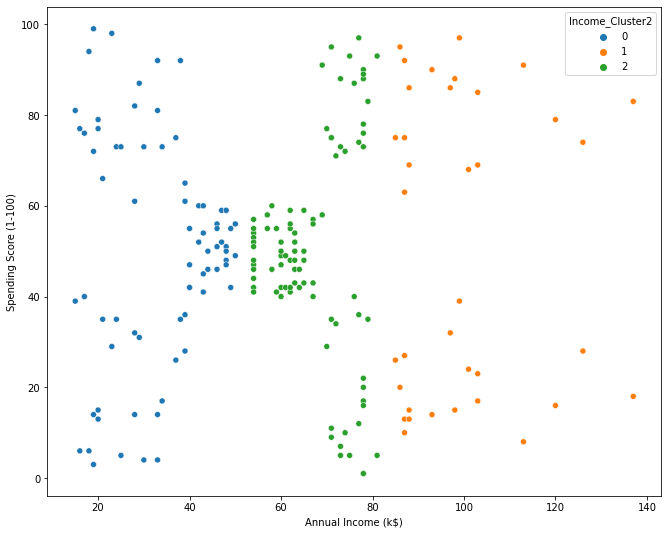

In [90]:
plt.figure(figsize=(11,9))
sns.scatterplot(data=df, x='Annual Income (k$)',
                y='Spending Score (1-100)',hue='Income_Cluster2',
                palette='tab10');
#save figure
plt.savefig('clus_univ.png')

#### Bivariate cluster

In [91]:
# Bivariate clustering

clus3 = KMeans(n_clusters=5)
clus3.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending_Income_Cluster'] = clus3.labels_

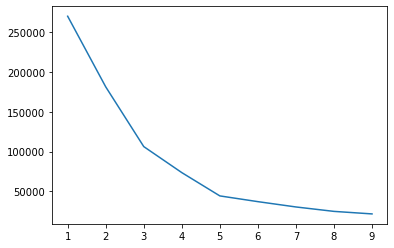

In [92]:
# Inertia score plot
inertia_score = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_score.append(kmeans.inertia_)
plt.plot(range(1,10),inertia_score);

Elbow at 5. I repeated this three more times untill there was a minimal change in elbow position.

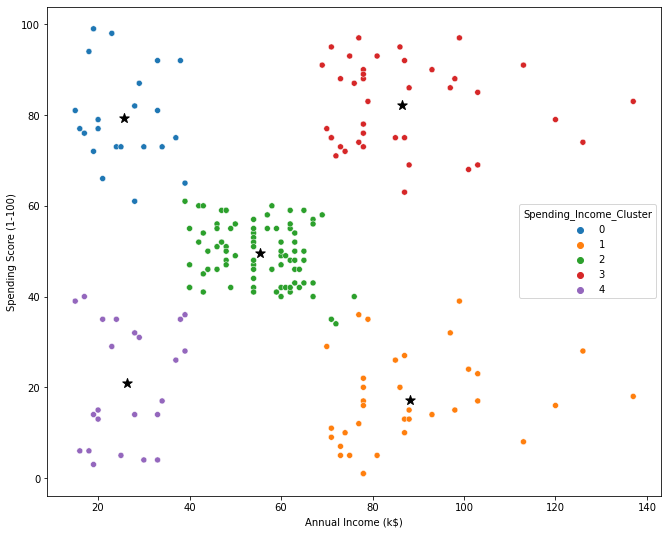

In [93]:
# Cluster plot
#centres
centroid = pd.DataFrame(clus3.cluster_centers_)
centroid.columns = ['x','y']

#plot
plt.figure(figsize=(11,9))
plt.scatter(x=centroid['x'], y=centroid['y'], s=100, c='black',marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)',
                hue='Spending_Income_Cluster',palette='tab10');

#save figure
plt.savefig('clus_biv.png')

In [94]:
# Cluster analysis
#Gender distribution
pd.crosstab(df['Spending_Income_Cluster'],df['Gender'])

Gender,Female,Male
Spending_Income_Cluster,,
0,13,9
1,16,19
2,48,33
3,21,18
4,14,9


In [95]:
#Average age,income and spending score
df.groupby('Spending_Income_Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending_Income_Cluster,,,
0,25.272727,25.727273,79.363636
1,41.114286,88.200000,17.114286
2,42.716049,55.296296,49.518519
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


#### Multivariate cluster

In [39]:
# Initialize scaler
scale = StandardScaler()

In [44]:
#new df with gender as a numerical value
new_df = pd.get_dummies(df, drop_first=True)
#drop unnecesary columns
columns = ['Income_Cluster1', 'Income_Cluster2', 'Spending_Income_Cluster']
new_df.drop(columns, axis=1, inplace = True)
new_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


Hint

new_df['Gender_Male']:

    1 - Male,
    
    0 - Female

In [45]:
#scale the new dataframe
new_df= pd.DataFrame(scale.fit_transform(new_df))
new_df.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


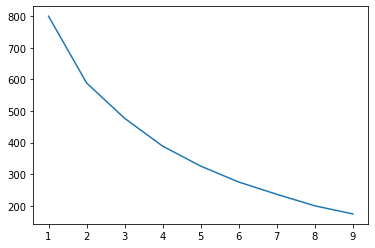

In [55]:
#plot the scale
inertia_scores=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(new_df)
    inertia_scores.append(kmeans.inertia_)
plt.plot(range(1,10), inertia_scores);

Elbow at 2

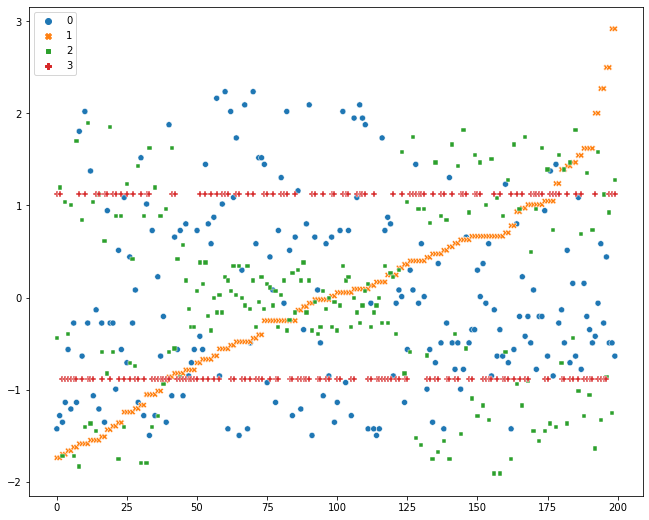

In [62]:
# Cluster plot
plt.figure(figsize=(11,9))
sns.scatterplot(data=new_df);
plt.savefig('clus_mul.png')

#### Generated Insights

1. Cluster ```0``` comprise of high income earners and highest expenditures. This cluster is critical for the company given that a little marketing campaign can drive sales to the next level.
2. The highest expenditures aredone by young adults between age 25 years and 35 years. The older generation seem to spend less despite earning substantially high.
3. The average expenditure is registered by cluster ```1``` which comprises of ```60%``` women.
4. Generally, women spend more as compared to men.

In [ ]:
# Save datasets
df.to_csv('training1.csv')

new_df.to_csv('training1.csv')